# Trabajo practico 1

### Punto 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# a
def gcl(seed = 10, iterations = 10, multiplier = 1013904223, addition = 1664525, module = 232, normalize = False):
  results = []
  x = seed
  for _ in range(iterations):
    ecuation = (multiplier * x + addition) % module
    x = ecuation / module if normalize else ecuation
    results.append(x)

  return results

gcl()

[211, 90, 179, 10, 211, 90, 179, 10, 211, 90]

In [3]:
# b
gcl(normalize=True)

[0.9094827586206896,
 0.09789313324566545,
 0.768105525459195,
 0.4524685853514178,
 0.6485458553351205,
 0.5971268353791073,
 0.2459375113248825,
 0.6824414167424728,
 0.5835573108031832,
 0.6671804780590123]

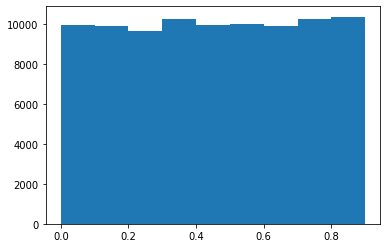

In [4]:
# c
def gcl_with_histogram(seed=10, iterations=10, multiplier=1013904223, addition=1664525, module=232, normalize=False):
  results = gcl(seed, iterations, multiplier, addition, module, normalize)
  bins = [ bin / 10 for bin in range(10) ]
  plt.hist(results, bins)
  plt.show()

gcl_with_histogram(iterations = 100000, normalize = True)

### Punto 2

Para la siguiente función de densidad de probabilidad se pide:

![image](https://user-images.githubusercontent.com/23021528/64925793-3391bc80-d7cc-11e9-9d24-59b28160bfd1.png)

a) Graficar la función de densidad de probabilidad.

b) Calcular y graficar la función de probabilidad acumulada y su inversa.

c) Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 y aplicando el método de la transformada inversa genere 100.000 números pseudoaleatorios.

d) Realizar un histograma con los valores obtenidos en el punto anterior

In [5]:
_lambda = 1 / 15

def x_values(start, end, step):
    return [step * x_ for x_ in range(start, 1 + int(end / step))]


def y_values(x_values_, function):
    return [function(x_) for x_ in x_values_]

x = x_values(start=0, end=250, step=0.5)

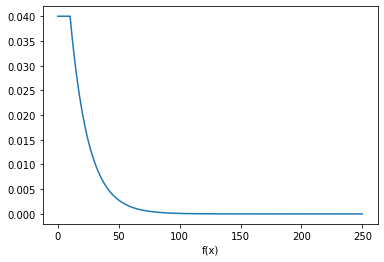

In [6]:
#a
def generate_f(lambda_):
    def f_(t):
        if 0 <= t < 10:
            return 1 / 25
        elif 10 <= t:
            return (3 / 5) * lambda_ * np.exp(lambda_ * (10 - t))
        else:
            raise Exception('f: t has to be positive or zero')

    return f_


plt.plot(x, y_values(x, function=generate_f(_lambda)))
plt.xlabel('f(x)')
plt.show()

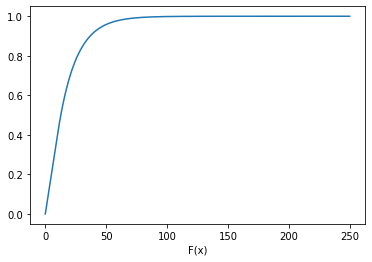

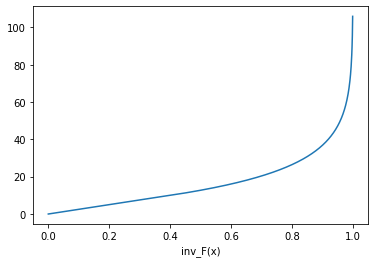

In [7]:
#b
def generate_F(lambda_):
    def F_(t):
        if 0 <= t < 10:
            return (1 / 25) * t
        elif 10 <= t:
            return -3 / 5 * np.exp(lambda_ * (10 - t)) + (10 / 25 + 3 / 5)
        else:
            raise Exception('F: t has to be positive or zero')

    return F_


def generate_inv_F(lambda_):
    def inv_F_(t):
        if 0 <= t < 10 / 25:
            return 25 * t
        elif 10 / 25 <= t <= 1:
            return 10 - (1 / lambda_) * np.log((5 / 3) * ((10 / 25) + (3 / 5) - t))
        else:
            raise Exception('inv_F: t has to be between 0 and 1')

    return inv_F_

plt.plot(x, y_values(x, function=generate_F(_lambda)))
plt.xlabel('F(x)')
plt.show()

x = x_values(start=0, end=0.999, step=0.001)

plt.plot(x, y_values(x, function=generate_inv_F(_lambda)))
plt.xlabel('inv_F(x)')
plt.show()

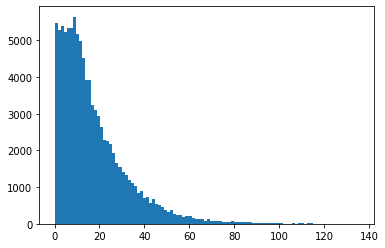

In [8]:
#c, d
sample_count = 100000
inv_F = generate_inv_F(_lambda)
f_random_samples = [inv_F(random) for random in gcl(normalize=True, iterations=sample_count)]
plt.hist(f_random_samples, bins=100)
plt.show()